In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraud.csv')
df.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0


In [3]:
df = df.drop(['step', 'nameOrig', 'nameDest'], axis = 1)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0,0
1,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,0,0
2,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,0,0
3,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,0,0
4,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,0,0


In [4]:
df['type'].value_counts()

type
CASH_OUT    224216
PAYMENT     214968
CASH_IN     139614
TRANSFER     53294
DEBIT         4170
Name: count, dtype: int64

In [5]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,1.800585e+05,8.317937e+05,8.528354e+05,1.096212e+06,1.221809e+06,0.001290,0.000003
std,6.069714e+05,2.885636e+06,2.921296e+06,3.375389e+06,3.656213e+06,0.035898,0.001773
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147127e+05,0.000000,0.000000
75%,2.084988e+05,1.072998e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000,0.000000
max,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_3588\4003535046.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_3588\4003535046.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceOrg'])
C:\Users\Dell\AppData\Local\Temp\ipyker

<Axes: xlabel='newbalanceDest', ylabel='Density'>

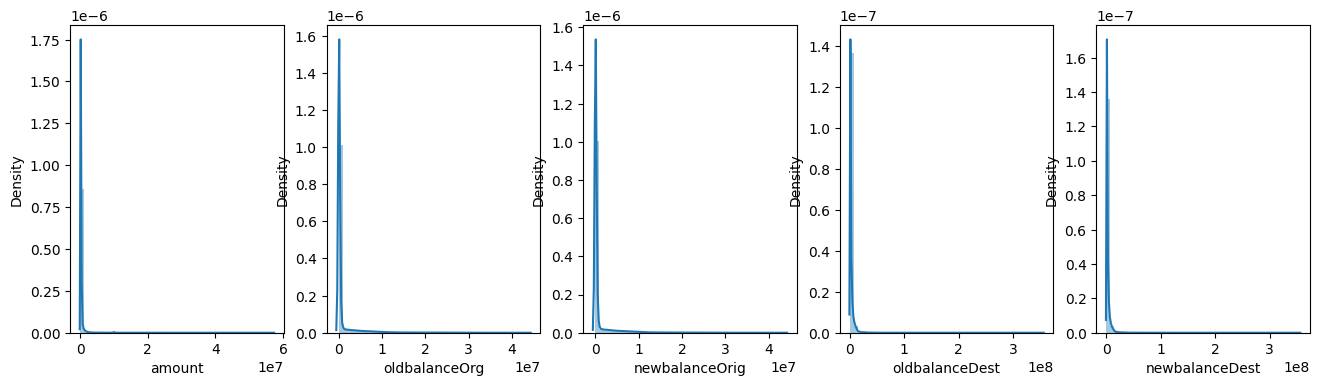

In [6]:
plt.figure(figsize = (16,4))

plt.subplot(1,5,1)
sns.distplot(df['amount'])

plt.subplot(1,5,2)
sns.distplot(df['oldbalanceOrg'])

plt.subplot(1,5,3)
sns.distplot(df['newbalanceOrig'])

plt.subplot(1,5,4)
sns.distplot(df['oldbalanceDest'])

plt.subplot(1,5,5)
sns.distplot(df['newbalanceDest'])

<Axes: ylabel='newbalanceDest'>

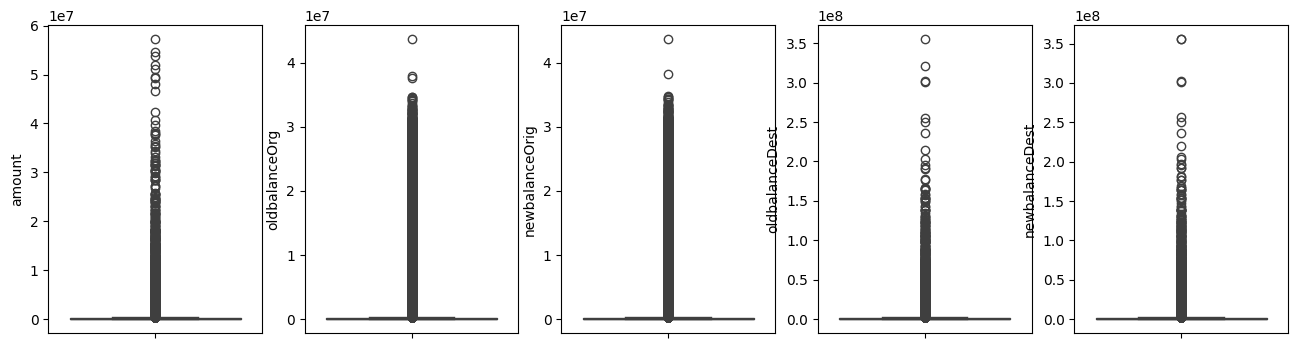

In [7]:
plt.figure(figsize = (16,4))

plt.subplot(1,5,1)
sns.boxplot(df['amount'])

plt.subplot(1,5,2)
sns.boxplot(df['oldbalanceOrg'])

plt.subplot(1,5,3)
sns.boxplot(df['newbalanceOrig'])

plt.subplot(1,5,4)
sns.boxplot(df['oldbalanceDest'])

plt.subplot(1,5,5)
sns.boxplot(df['newbalanceDest'])

In [ ]:
# amount	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest	isFraud	isFlaggedFraud

In [14]:
df['amount'] = (df['amount'] - df['amount'].mean())/ df['amount'].std()

In [15]:
df['oldbalanceOrg'] = (df['oldbalanceOrg'] - df['oldbalanceOrg'].mean())/ df['oldbalanceOrg'].std()


In [16]:
df['newbalanceOrig'] = (df['newbalanceOrig'] - df['newbalanceOrig'].mean())/ df['newbalanceOrig'].std()


In [17]:
df['oldbalanceDest'] = (df['oldbalanceDest'] - df['oldbalanceDest'].mean())/ df['oldbalanceDest'].std()


In [18]:
df['newbalanceDest'] = (df['newbalanceDest'] - df['newbalanceDest'].mean())/ df['newbalanceDest'].std()


In [19]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,-5.003020e-18,-3.793585e-17,-1.409333e-17,2.229024e-17,9.921167e-17,0.001290,0.000003
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.035898,0.001773
min,-2.966508e-01,-2.882531e-01,-2.919373e-01,-3.247662e-01,-3.341733e-01,0.000000,0.000000
25%,-2.745617e-01,-2.882531e-01,-2.919373e-01,-3.247662e-01,-3.341733e-01,0.000000,0.000000
50%,-1.733900e-01,-2.833187e-01,-2.919373e-01,-2.857960e-01,-2.754478e-01,0.000000,0.000000
75%,4.685599e-02,-2.510690e-01,-2.427930e-01,-4.672950e-02,-3.079091e-02,0.000000,0.000000
max,9.399053e+01,1.485108e+01,1.465821e+01,1.049033e+02,9.691220e+01,1.000000,1.000000


In [26]:
df[(df['amount']>9) | (df['amount']<-2)]
new_amount = [df[(df['amount']<9) & (df['amount']>-2)]]

In [27]:
df[(df['oldbalanceOrg']>1.4) | (df['oldbalanceOrg']<-2.5)]
new_oldbalanceorg = [df[(df['oldbalanceOrg']<9) & (df['oldbalanceOrg']>-2)]]

In [28]:
df[(df['newbalanceOrig']>1.4) | (df['newbalanceOrig']<-2.5)]
new_newbalanceorig = [df[(df['newbalanceOrig']<9) & (df['newbalanceOrig']>-2)]]

In [29]:
df[(df['oldbalanceDest']>1) | (df['oldbalanceDest']<-3)]
new_oldbalanceDest = [df[(df['oldbalanceDest']<9) & (df['oldbalanceDest']>-2)]]

In [30]:
df[(df['newbalanceDest']>9) | (df['newbalanceDest']<-3)]
new_newbalanceDest = [df[(df['newbalanceDest']<9) & (df['newbalanceDest']>-2)]]

In [36]:
df1 = np.concatenate((new_amount, new_oldbalanceorg, new_newbalanceorig, new_oldbalanceDest, new_newbalanceDest), axis =1)

In [46]:
df1_reshaped = df1.reshape(-1, df1.shape[-1])  # Reshape to 2D
df = pd.DataFrame(df1_reshaped)
df.columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,0.049873,1.021012,1.073344,0.125335,0.02383,0,0
1,CASH_OUT,0.058373,-0.280796,-0.291937,1.555241,1.524295,0,0
2,DEBIT,-0.289351,-0.281089,-0.286377,-0.300806,-0.310841,0,0
3,CASH_OUT,0.055963,-0.271997,-0.291937,3.66513,3.407807,0,0
4,CASH_OUT,-0.282056,-0.288253,-0.291937,0.169156,0.124235,0,0
...,...,...,...,...,...,...,...,...
3177538,CASH_OUT,-0.249266,-0.288253,-0.291937,-0.227434,-0.23645,0,0
3177539,CASH_OUT,-0.020162,-0.266676,-0.291937,-0.293235,-0.259164,0,0
3177540,PAYMENT,-0.281991,-0.277577,-0.284437,-0.324766,-0.334173,0,0
3177541,CASH_OUT,-0.006443,-0.259258,-0.291937,-0.324766,-0.285996,0,0


<Axes: ylabel='newbalanceDest'>

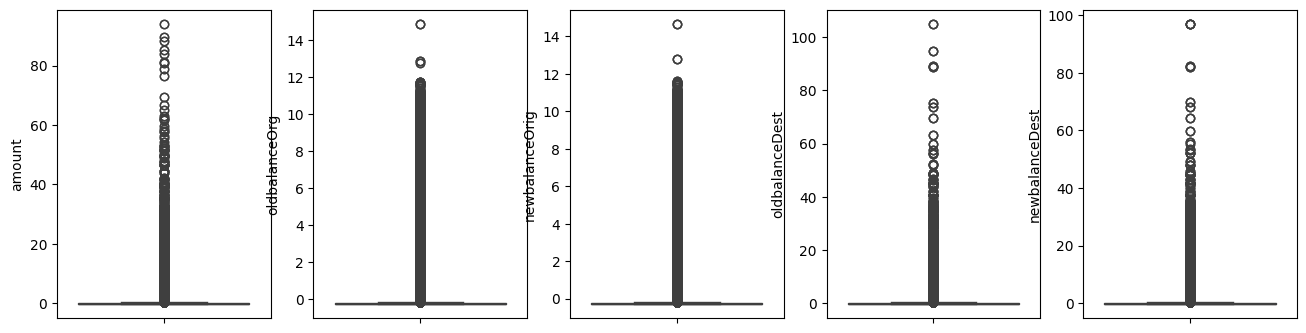

In [47]:
plt.figure(figsize = (16,4))

plt.subplot(1,5,1)
sns.boxplot(df['amount'])

plt.subplot(1,5,2)
sns.boxplot(df['oldbalanceOrg'])

plt.subplot(1,5,3)
sns.boxplot(df['newbalanceOrig'])

plt.subplot(1,5,4)
sns.boxplot(df['oldbalanceDest'])

plt.subplot(1,5,5)
sns.boxplot(df['newbalanceDest'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_3588\4003535046.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_3588\4003535046.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceOrg'])
C:\Users\Dell\AppData\Local\Temp\ipyker

<Axes: xlabel='newbalanceDest', ylabel='Density'>

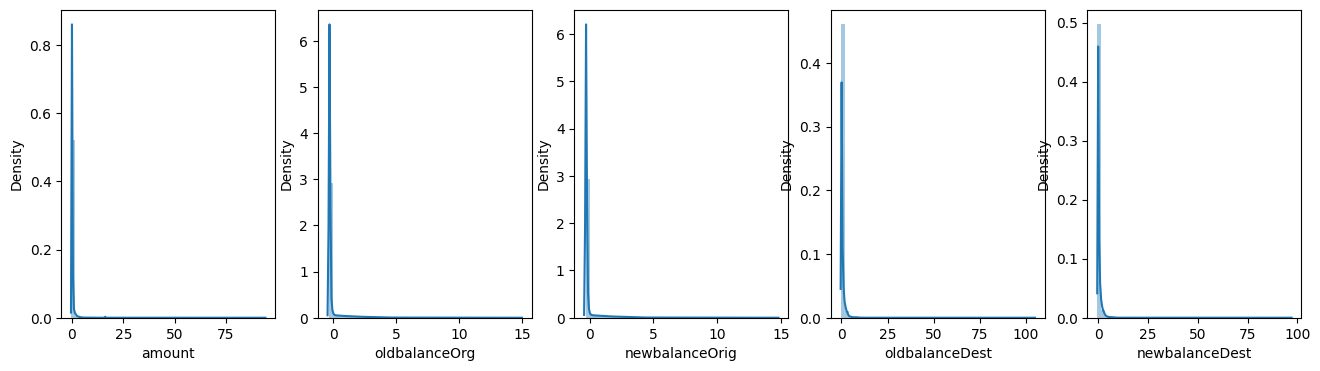

In [58]:
plt.figure(figsize = (16,4))

plt.subplot(1,5,1)
sns.distplot(df['amount'])

plt.subplot(1,5,2)
sns.distplot(df['oldbalanceOrg'])

plt.subplot(1,5,3)
sns.distplot(df['newbalanceOrig'])

plt.subplot(1,5,4)
sns.distplot(df['oldbalanceDest'])

plt.subplot(1,5,5)
sns.distplot(df['newbalanceDest'])

In [48]:
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
X.shape

(3177543, 6)

In [49]:
y = df['isFraud']
y.shape

(3177543,)

In [50]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [51]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)


Shape of X_train (2542034, 6)
Shape of X_test (635509, 6)
Shape of y_train (2542034,)
Shape of y_test (635509,)


In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first' , sparse_output = False  )
X_train_type_ohe = ohe.fit_transform(X_train[['type']])
X_test_type_ohe = ohe.transform(X_test[['type']])

In [53]:
X_train_type_ohe

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [54]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
X_train_si = si.fit_transform(X_train[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']])
X_test_si = si.fit_transform(X_test[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']])

In [55]:
from sklearn.preprocessing import StandardScaler
scale  = StandardScaler()


In [56]:
X_trained_ss = scale.fit(X_train[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']])


In [57]:
X_test_ss = scale.fit(X_test[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']])


In [59]:
X_trained_ss

StandardScaler()

In [60]:
X_test_ss

StandardScaler()

In [61]:
scale.mean_

array([-0.00964227, -0.00575054, -0.00555315, -0.01044121, -0.01155414])